# 1. Introduction
The aim of this notebook is to clean the scraped NBA player stats data to predict MVP. <br>
Adapted from [Dataquest's](https://www.youtube.com/watch?v=LobWMsz35NM) YouTube video. <br>

This is a three part project:
* Dataset: [1991-2021 NBA Stats](https://www.kaggle.com/datasets/vivovinco/19912021-nba-stats) <br>
* First part: [NBA Stats: Web Scraping](https://www.kaggle.com/code/vivovinco/nba-stats-web-scraping) <br>
* Second part: [NBA Stats: Data Cleaning](https://www.kaggle.com/code/vivovinco/nba-stats-data-cleaning) <br>
* Third part: [NBA Stats: MVP Prediction](https://www.kaggle.com/code/vivovinco/nba-stats-mvp-prediction) <br>

**If you're reading this, please upvote.**

In [1]:
# libraries
import pandas as pd

# unhide all rows and columns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# 2. Cleaning Data
To prevent errors, specify encoding and delimiter while loading the datasets. 

In [2]:
mvps = pd.read_csv("../input/19912021-nba-stats/mvps.csv", encoding="latin-1", delimiter=";")
mvps

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77,891,960,0.928,82,37.0,31.5,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10,497,960,0.518,79,37.1,19.4,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6,476,960,0.496,82,37.7,25.6,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2,222,960,0.231,67,37.3,27.6,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0,142,960,0.148,82,40.3,29.0,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,11,Russell Westbrook,32,WAS,0,5,1010,0.005,65,36.4,22.2,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
470,12,Ben Simmons,24,PHI,0,3,1010,0.003,58,32.4,14.3,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
471,13T,James Harden,31,TOT,0,1,1010,0.001,44,36.6,24.6,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
472,13T,LeBron James,36,LAL,0,1,1010,0.001,45,33.4,25.0,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


In [3]:
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1991,891,960,0.928
1,Magic Johnson,1991,497,960,0.518
2,David Robinson,1991,476,960,0.496
3,Charles Barkley,1991,222,960,0.231
4,Karl Malone,1991,142,960,0.148


In [4]:
players = pd.read_csv("../input/19912021-nba-stats/players.csv", encoding="latin-1", delimiter=";")
players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,0.474,0,0,0,1.3,2.7,0.474,0.474,0.6,1,0.568,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,0.413,0.4,1.5,0.24,5.9,13.6,0.432,0.425,1.3,1.5,0.857,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,0.509,0,0,0.333,1.6,3.1,0.512,0.512,1,1.5,0.653,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,0.394,2.5,8.5,0.296,6,13,0.459,0.453,7,8,0.879,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,0.462,0.3,1,0.308,5.1,10.7,0.477,0.475,3.1,4.1,0.757,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,0.462,1.2,3.1,0.398,2.6,5.3,0.5,0.536,1.1,1.3,0.833,1,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10,2021
18040,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,0.559,0.2,0.7,0.267,5.3,9.1,0.58,0.568,1,1.7,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2,2.2,12.1,2021
18041,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,2.2,6.3,0.343,5.6,11.3,0.491,0.499,7.7,8.7,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18042,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,0.559,0.1,0.6,0.143,3.7,6.2,0.598,0.565,1.8,2.5,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


Delete unnecessary columns.

In [5]:
del players["Rk"]

Remove asterisks from player names.

In [6]:
players["Player"] = players["Player"].str.replace("*","", regex=False)

In [7]:
players.tail(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
18034,James Wiseman,C,19,GSW,39,27,21.4,4.9,9.4,0.519,0.3,1,0.316,4.6,8.5,0.542,0.535,1.4,2.2,0.628,1.4,4.4,5.8,0.7,0.3,0.9,1.5,3.1,11.5,2021
18035,Christian Wood,C,25,HOU,41,41,32.3,8,15.6,0.514,1.9,5,0.374,6.1,10.6,0.581,0.574,3,4.8,0.631,1.9,7.8,9.6,1.7,0.8,1.2,2,2.1,21,2021
18036,Robert Woodard II,SF,21,SAC,13,0,3.5,0.6,1.5,0.4,0.1,0.5,0.167,0.5,1.1,0.5,0.425,0.2,0.6,0.375,0.3,0.9,1.2,0.2,0,0.2,0.1,0.3,1.5,2021
18037,Delon Wright,SG-PG,28,TOT,63,39,27.7,3.8,8.2,0.463,1,2.7,0.372,2.8,5.5,0.509,0.525,1.6,2,0.802,1,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2,2021
18038,Delon Wright,SG,28,DET,36,31,29.2,3.8,8.1,0.464,0.9,2.5,0.348,2.9,5.7,0.515,0.517,2,2.5,0.789,1,3.5,4.6,5,1.6,0.5,1.3,1.3,10.4,2021
18039,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,0.462,1.2,3.1,0.398,2.6,5.3,0.5,0.536,1.1,1.3,0.833,1,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10,2021
18040,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,0.559,0.2,0.7,0.267,5.3,9.1,0.58,0.568,1,1.7,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2,2.2,12.1,2021
18041,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,2.2,6.3,0.343,5.6,11.3,0.491,0.499,7.7,8.7,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18042,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,0.559,0.1,0.6,0.143,3.7,6.2,0.598,0.565,1.8,2.5,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021
18043,Ivica Zubac,C,23,LAC,72,33,22.3,3.6,5.5,0.652,0,0.1,0.25,3.6,5.4,0.656,0.654,1.9,2.4,0.789,2.6,4.6,7.2,1.3,0.3,0.9,1.1,2.6,9,2021


In [8]:
players[players["Player"] == "Delon Wright"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
14590,Delon Wright,PG,23,TOR,27,1,8.5,1.3,3,0.45,0.2,0.5,0.385,1.1,2.5,0.463,0.481,1,1.3,0.743,0.3,1.1,1.4,1.1,0.3,0.1,0.6,0.3,3.8,2016
15205,Delon Wright,PG,24,TOR,27,0,16.5,1.8,4.3,0.422,0.4,1.1,0.333,1.4,3.2,0.453,0.466,1.6,2,0.764,0.6,1.2,1.8,2.1,1,0.4,0.9,1.1,5.6,2017
15892,Delon Wright,PG,25,TOR,69,4,20.8,2.9,6.3,0.465,0.8,2.2,0.366,2.1,4,0.52,0.53,1.4,1.7,0.829,0.7,2.2,2.9,2.9,1,0.5,1.1,1.2,8,2018
16623,Delon Wright,PG,26,TOT,75,13,22.7,3.2,7.4,0.434,0.7,2.2,0.298,2.6,5.2,0.492,0.478,1.6,2,0.793,0.9,2.6,3.5,3.3,1.2,0.4,1,1.4,8.7,2019
16624,Delon Wright,PG,26,TOR,49,2,18.3,2.6,6,0.433,0.6,1.8,0.333,2,4.1,0.478,0.485,1.1,1.2,0.869,0.8,1.8,2.6,2.2,0.9,0.3,0.8,1.1,6.9,2019
16625,Delon Wright,PG,26,MEM,26,11,30.8,4.4,10.2,0.434,0.8,3,0.256,3.7,7.2,0.508,0.472,2.5,3.4,0.742,1.1,4.3,5.4,5.3,1.6,0.6,1.5,1.9,12.2,2019
17306,Delon Wright,PG,27,DAL,73,5,21.5,2.6,5.6,0.462,0.6,1.7,0.37,2,3.9,0.504,0.519,1.1,1.4,0.77,1,2.9,3.8,3.3,1.2,0.3,1,1.3,6.9,2020
18037,Delon Wright,SG-PG,28,TOT,63,39,27.7,3.8,8.2,0.463,1,2.7,0.372,2.8,5.5,0.509,0.525,1.6,2,0.802,1,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2,2021
18038,Delon Wright,SG,28,DET,36,31,29.2,3.8,8.1,0.464,0.9,2.5,0.348,2.9,5.7,0.515,0.517,2,2.5,0.789,1,3.5,4.6,5,1.6,0.5,1.3,1.3,10.4,2021
18039,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,0.462,1.2,3.1,0.398,2.6,5.3,0.5,0.536,1.1,1.3,0.833,1,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10,2021


Merge player names to create one row for each year. 

In [9]:
def single_team(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Tm"]=="TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row

players = players.groupby(["Player", "Year"]).apply(single_team)

In [10]:
players.tail(10)

Player Pos Age   Tm   G  GS    MP   FG  FGA    FG%   3P  3PA    3P%   2P  2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  Year
Player       Year                                                                                                                                                                               
Óscar Torres 2002 6174   Óscar Torres  SG  25  HOU  65  13  16.5  2.1  5.2  0.396  0.6  1.9  0.294  1.5  3.3  0.456   0.45  1.3  1.6  0.781  0.7  1.2   1.9  0.6  0.4  0.1  0.8    1     6  2002
             2003 6664   Óscar Torres  SG  26  GSW  17   0   6.4  0.9  2.1  0.444  0.4  0.8  0.538  0.5  1.4  0.391  0.542  0.8  1.2    0.7  0.2  0.5   0.7  0.2  0.2  0.1  0.5  0.5   3.1  2003
Ömer Aþýk    2011 10911     Ömer Aþýk   C  24  CHI  82   0  12.1    1  1.7  0.553    0    0      0    1  1.7  0.553  0.553  0.9  1.8  0.503  1.4  2.4   3.7  0.4  0.2  0.7  0.8  1.9   2.8  2011
             2012 11542     Ömer Aþýk   C  25  CHI  66   2  14.7  1.2  2.4  0.506    0    0      0  1.2  2.4  0.506  0.506  0.7  1.6  0.456  1.9  3.4   5.3  0.5  0.5    1    1  1.8   3.1  2012
             2013 12121     Ömer Aþýk   C  26  HOU  82  82    30    4  7.5  0.541    0    0      0    4  7.5  0.542  0.541    2  3.6  0.562  3.4  8.3  11.7  0.9  0.6  1.1  2.1  2.7  10.1  2013
             2014 12723     Ömer Aþýk   C  27  HOU  48  19  20.2  2.1    4  0.532    0    0      0  2.1    4  0.532  0.532  1.6  2.6  0.619  2.1  5.8   7.9  0.5  0.3  0.8  1.2  1.9   5.8  2014
             2015 13351     Ömer Aþýk   C  28  NOP  76  76  26.1  2.8  5.4  0.517    0    0      0  2.8  5.4  0.517  0.517  1.7    3  0.582  3.2  6.6   9.8  0.9  0.4  0.7  1.3  1.9   7.3  2015
             2016 14025     Ömer Aþýk   C  29  NOP  68  64  17.3  1.5  2.9  0.533    0    0      0  1.5  2.9  0.533  0.533  0.9  1.6  0.545  1.8  4.3   6.1  0.4  0.3  0.3  0.9  1.8     4  2016
             2017 14622     Ömer Aþýk   C  30  NOP  31  19  15.5    1  2.1  0.477    0    0      0    1  2.1  0.477  0.477  0.7  1.3   0.59  1.5  3.7   5.3  0.5  0.2  0.3  0.5  1.6   2.7  2017
             2018 15238     Ömer Aþýk   C  31  CHI  18   0  10.1  0.5  1.2  0.409    0    0      0  0.5  1.2  0.409  0.409  0.2  0.7  0.308  0.5  2.1   2.6  0.2  0.1  0.2  0.5  1.1   1.2  2018

Remove added index columns.

In [11]:
players.index = players.index.droplevel()
players.index = players.index.droplevel()

In [12]:
players.tail(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
6174,Óscar Torres,SG,25,HOU,65,13,16.5,2.1,5.2,0.396,0.6,1.9,0.294,1.5,3.3,0.456,0.45,1.3,1.6,0.781,0.7,1.2,1.9,0.6,0.4,0.1,0.8,1,6,2002
6664,Óscar Torres,SG,26,GSW,17,0,6.4,0.9,2.1,0.444,0.4,0.8,0.538,0.5,1.4,0.391,0.542,0.8,1.2,0.7,0.2,0.5,0.7,0.2,0.2,0.1,0.5,0.5,3.1,2003
10911,Ömer Aþýk,C,24,CHI,82,0,12.1,1,1.7,0.553,0,0,0,1,1.7,0.553,0.553,0.9,1.8,0.503,1.4,2.4,3.7,0.4,0.2,0.7,0.8,1.9,2.8,2011
11542,Ömer Aþýk,C,25,CHI,66,2,14.7,1.2,2.4,0.506,0,0,0,1.2,2.4,0.506,0.506,0.7,1.6,0.456,1.9,3.4,5.3,0.5,0.5,1,1,1.8,3.1,2012
12121,Ömer Aþýk,C,26,HOU,82,82,30,4,7.5,0.541,0,0,0,4,7.5,0.542,0.541,2,3.6,0.562,3.4,8.3,11.7,0.9,0.6,1.1,2.1,2.7,10.1,2013
12723,Ömer Aþýk,C,27,HOU,48,19,20.2,2.1,4,0.532,0,0,0,2.1,4,0.532,0.532,1.6,2.6,0.619,2.1,5.8,7.9,0.5,0.3,0.8,1.2,1.9,5.8,2014
13351,Ömer Aþýk,C,28,NOP,76,76,26.1,2.8,5.4,0.517,0,0,0,2.8,5.4,0.517,0.517,1.7,3,0.582,3.2,6.6,9.8,0.9,0.4,0.7,1.3,1.9,7.3,2015
14025,Ömer Aþýk,C,29,NOP,68,64,17.3,1.5,2.9,0.533,0,0,0,1.5,2.9,0.533,0.533,0.9,1.6,0.545,1.8,4.3,6.1,0.4,0.3,0.3,0.9,1.8,4,2016
14622,Ömer Aþýk,C,30,NOP,31,19,15.5,1,2.1,0.477,0,0,0,1,2.1,0.477,0.477,0.7,1.3,0.59,1.5,3.7,5.3,0.5,0.2,0.3,0.5,1.6,2.7,2017
15238,Ömer Aþýk,C,31,CHI,18,0,10.1,0.5,1.2,0.409,0,0,0,0.5,1.2,0.409,0.409,0.2,0.7,0.308,0.5,2.1,2.6,0.2,0.1,0.2,0.5,1.1,1.2,2018


In [13]:
players[players["Player"] == "Delon Wright"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
14590,Delon Wright,PG,23,TOR,27,1,8.5,1.3,3,0.45,0.2,0.5,0.385,1.1,2.5,0.463,0.481,1,1.3,0.743,0.3,1.1,1.4,1.1,0.3,0.1,0.6,0.3,3.8,2016
15205,Delon Wright,PG,24,TOR,27,0,16.5,1.8,4.3,0.422,0.4,1.1,0.333,1.4,3.2,0.453,0.466,1.6,2,0.764,0.6,1.2,1.8,2.1,1,0.4,0.9,1.1,5.6,2017
15892,Delon Wright,PG,25,TOR,69,4,20.8,2.9,6.3,0.465,0.8,2.2,0.366,2.1,4,0.52,0.53,1.4,1.7,0.829,0.7,2.2,2.9,2.9,1,0.5,1.1,1.2,8,2018
16623,Delon Wright,PG,26,MEM,75,13,22.7,3.2,7.4,0.434,0.7,2.2,0.298,2.6,5.2,0.492,0.478,1.6,2,0.793,0.9,2.6,3.5,3.3,1.2,0.4,1,1.4,8.7,2019
17306,Delon Wright,PG,27,DAL,73,5,21.5,2.6,5.6,0.462,0.6,1.7,0.37,2,3.9,0.504,0.519,1.1,1.4,0.77,1,2.9,3.8,3.3,1.2,0.3,1,1.3,6.9,2020
18037,Delon Wright,SG-PG,28,SAC,63,39,27.7,3.8,8.2,0.463,1,2.7,0.372,2.8,5.5,0.509,0.525,1.6,2,0.802,1,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2,2021


Let's combine player and MVP data.

In [14]:
combined = players.merge(mvps, how="outer", on=["Player", "Year"])

In [15]:
combined[combined["Pts Won"] > 0]
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,0.453,0,0,0,0.6,1.4,0.462,0.453,0.7,1.2,0.614,0.6,0.9,1.5,0.1,0.1,0.2,0.5,1,2,1995,NaN,NaN,NaN
1,?an Tabak,C,25,TOR,67,18,19.9,3.4,6.2,0.543,0,0,0,3.4,6.2,0.545,0.543,1,1.7,0.561,1.7,3,4.8,0.9,0.4,0.5,1.5,3,7.7,1996,NaN,NaN,NaN
2,?an Tabak,C,26,TOR,13,4,16.8,2.5,5.5,0.451,0,0,0,2.5,5.5,0.451,0.451,1.5,2.2,0.69,1.5,2.2,3.8,1.1,0.5,0.8,1.6,2.7,6.5,1997,NaN,NaN,NaN
3,?an Tabak,C,27,BOS,57,34,17.3,2.5,5.3,0.467,0,0,0,2.5,5.3,0.469,0.467,0.4,1.1,0.377,1.5,2.2,3.7,0.8,0.4,0.7,1.1,2.9,5.4,1998,NaN,NaN,NaN
4,?an Tabak,C,29,IND,18,0,6.3,0.9,1.9,0.471,0,0,0,0.9,1.9,0.471,0.471,0.3,0.4,0.625,0.9,0.9,1.8,0.2,0.2,0.5,0.6,0.7,2.1,2000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Ömer Aþýk,C,27,HOU,48,19,20.2,2.1,4,0.532,0,0,0,2.1,4,0.532,0.532,1.6,2.6,0.619,2.1,5.8,7.9,0.5,0.3,0.8,1.2,1.9,5.8,2014,NaN,NaN,NaN
14088,Ömer Aþýk,C,28,NOP,76,76,26.1,2.8,5.4,0.517,0,0,0,2.8,5.4,0.517,0.517,1.7,3,0.582,3.2,6.6,9.8,0.9,0.4,0.7,1.3,1.9,7.3,2015,NaN,NaN,NaN
14089,Ömer Aþýk,C,29,NOP,68,64,17.3,1.5,2.9,0.533,0,0,0,1.5,2.9,0.533,0.533,0.9,1.6,0.545,1.8,4.3,6.1,0.4,0.3,0.3,0.9,1.8,4,2016,NaN,NaN,NaN
14090,Ömer Aþýk,C,30,NOP,31,19,15.5,1,2.1,0.477,0,0,0,1,2.1,0.477,0.477,0.7,1.3,0.59,1.5,3.7,5.3,0.5,0.2,0.3,0.5,1.6,2.7,2017,NaN,NaN,NaN


Replace NaN values with 0.

In [16]:
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,0.453,0,0,0,0.6,1.4,0.462,0.453,0.7,1.2,0.614,0.6,0.9,1.5,0.1,0.1,0.2,0.5,1,2,1995,0.0,0.0,0.0
1,?an Tabak,C,25,TOR,67,18,19.9,3.4,6.2,0.543,0,0,0,3.4,6.2,0.545,0.543,1,1.7,0.561,1.7,3,4.8,0.9,0.4,0.5,1.5,3,7.7,1996,0.0,0.0,0.0
2,?an Tabak,C,26,TOR,13,4,16.8,2.5,5.5,0.451,0,0,0,2.5,5.5,0.451,0.451,1.5,2.2,0.69,1.5,2.2,3.8,1.1,0.5,0.8,1.6,2.7,6.5,1997,0.0,0.0,0.0
3,?an Tabak,C,27,BOS,57,34,17.3,2.5,5.3,0.467,0,0,0,2.5,5.3,0.469,0.467,0.4,1.1,0.377,1.5,2.2,3.7,0.8,0.4,0.7,1.1,2.9,5.4,1998,0.0,0.0,0.0
4,?an Tabak,C,29,IND,18,0,6.3,0.9,1.9,0.471,0,0,0,0.9,1.9,0.471,0.471,0.3,0.4,0.625,0.9,0.9,1.8,0.2,0.2,0.5,0.6,0.7,2.1,2000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Ömer Aþýk,C,27,HOU,48,19,20.2,2.1,4,0.532,0,0,0,2.1,4,0.532,0.532,1.6,2.6,0.619,2.1,5.8,7.9,0.5,0.3,0.8,1.2,1.9,5.8,2014,0.0,0.0,0.0
14088,Ömer Aþýk,C,28,NOP,76,76,26.1,2.8,5.4,0.517,0,0,0,2.8,5.4,0.517,0.517,1.7,3,0.582,3.2,6.6,9.8,0.9,0.4,0.7,1.3,1.9,7.3,2015,0.0,0.0,0.0
14089,Ömer Aþýk,C,29,NOP,68,64,17.3,1.5,2.9,0.533,0,0,0,1.5,2.9,0.533,0.533,0.9,1.6,0.545,1.8,4.3,6.1,0.4,0.3,0.3,0.9,1.8,4,2016,0.0,0.0,0.0
14090,Ömer Aþýk,C,30,NOP,31,19,15.5,1,2.1,0.477,0,0,0,1,2.1,0.477,0.477,0.7,1.3,0.59,1.5,3.7,5.3,0.5,0.2,0.3,0.5,1.6,2.7,2017,0.0,0.0,0.0


Load the teams dataset for cleaning.

In [17]:
teams = pd.read_csv("../input/19912021-nba-stats/teams.csv", encoding="latin-1", delimiter=";")
teams.head(20)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,0.683,,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,0.537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,0.476,17,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,0.366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,0.317,30,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,0.293,32,101.8,107.8,-5.91,1991,Miami Heat
6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,61,21,0.744,,110,101,8.57,1991,Chicago Bulls*
8,50,32,0.61,11,100.1,96.8,3.08,1991,Detroit Pistons*
9,48,34,0.585,13,106.4,104,2.33,1991,Milwaukee Bucks*


Remove "Division" rows.

In [18]:
teams = teams[~teams["W"].str.contains("Division")].copy()

Remove asterisks.

In [19]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

In [20]:
sorted(teams["Team"].unique())

['Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Bobcats',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Jersey Nets',
 'New Orleans Hornets',
 'New Orleans Pelicans',
 'New Orleans/Oklahoma City Hornets',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Seattle SuperSonics',
 'Toronto Raptors',
 'Utah Jazz',
 'Vancouver Grizzlies',
 'Washington Bullets',
 'Washington Wizards']

In [21]:
sorted(combined["Tm"].unique())

['ATL',
 'BOS',
 'BRK',
 'CHA',
 'CHH',
 'CHI',
 'CHO',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NJN',
 'NOH',
 'NOK',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHO',
 'POR',
 'SAC',
 'SAS',
 'SEA',
 'TOR',
 'UTA',
 'VAN',
 'WAS',
 'WSB']

Replace abbreviations with full team names.

In [22]:
nicknames = {}
with open("../input/19912021-nba-stats/nicknames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n","").split(";")
        nicknames[abbrev] = name

In [23]:
combined["Team"] = combined["Tm"].map(nicknames)
combined.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,0.453,0,0,0,0.6,1.4,0.462,0.453,0.7,1.2,0.614,0.6,0.9,1.5,0.1,0.1,0.2,0.5,1,2,1995,0.0,0.0,0.0,Houston Rockets
1,?an Tabak,C,25,TOR,67,18,19.9,3.4,6.2,0.543,0,0,0,3.4,6.2,0.545,0.543,1,1.7,0.561,1.7,3,4.8,0.9,0.4,0.5,1.5,3,7.7,1996,0.0,0.0,0.0,Toronto Raptors
2,?an Tabak,C,26,TOR,13,4,16.8,2.5,5.5,0.451,0,0,0,2.5,5.5,0.451,0.451,1.5,2.2,0.69,1.5,2.2,3.8,1.1,0.5,0.8,1.6,2.7,6.5,1997,0.0,0.0,0.0,Toronto Raptors
3,?an Tabak,C,27,BOS,57,34,17.3,2.5,5.3,0.467,0,0,0,2.5,5.3,0.469,0.467,0.4,1.1,0.377,1.5,2.2,3.7,0.8,0.4,0.7,1.1,2.9,5.4,1998,0.0,0.0,0.0,Boston Celtics
4,?an Tabak,C,29,IND,18,0,6.3,0.9,1.9,0.471,0,0,0,0.9,1.9,0.471,0.471,0.3,0.4,0.625,0.9,0.9,1.8,0.2,0.2,0.5,0.6,0.7,2.1,2000,0.0,0.0,0.0,Indiana Pacers


In [24]:
train = combined.merge(teams, how="outer",on=["Team", "Year"])
train

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,0.453,0,0,0,0.6,1.4,0.462,0.453,0.7,1.2,0.614,0.6,0.9,1.5,0.1,0.1,0.2,0.5,1,2,1995,0.0,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
1,Adrian Caldwell,PF,28,HOU,7,0,4.3,0.1,0.6,0.25,0,0,0,0.1,0.6,0.25,0.25,0.4,0.9,0.5,0.1,1.3,1.4,0,0.1,0,0.1,0.9,0.7,1995,0.0,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
2,Carl Herrera,PF,28,HOU,61,26,21.8,2.8,5.4,0.523,0,0,0,2.8,5.3,0.526,0.523,1.2,1.9,0.624,1.6,3,4.6,0.7,0.7,0.6,1.2,2.2,6.8,1995,0.0,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
3,Charles Jones,PF,37,HOU,3,0,12,0.3,1,0.333,0,0,0,0.3,1,0.333,0.333,0.3,0.7,0.5,0.7,1.7,2.3,0,0,0.3,0,2.7,1,1995,0.0,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
4,Chucky Brown,SF,26,HOU,41,14,19.9,2.6,4.2,0.603,0,0.1,0.333,2.5,4.2,0.608,0.606,0.9,1.5,0.613,1.6,3,4.6,0.7,0.3,0.3,0.7,2.6,6.1,1995,0.0,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,0.5,1.5,0.309,2,3.6,0.556,0.529,0.8,1,0.846,0.7,2.8,3.5,1.5,0.3,0.6,0.9,1.4,6.2,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45
14088,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,0.1,0.8,0.167,0.1,0.1,1,0.357,0,0,0,0,0.4,0.4,0,0,0,0,0.1,0.6,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45
14089,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.47,0.4,1.4,0.253,3.9,7.7,0.508,0.489,1.9,3.1,0.606,1.2,4.5,5.7,1.1,0.7,1,0.9,1.2,10.8,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45
14090,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,0.5,1.3,0.378,1,1.9,0.514,0.536,0.6,0.9,0.653,0.7,1.3,2,0.4,0.2,0.5,0.3,1.5,4,2017,0.0,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45


Check data types and fix if necessary.

In [25]:
train.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [26]:
train = train.apply(pd.to_numeric, errors='ignore')
train.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

GB column is still shown as string...

In [27]:
train["GB"].unique()

array(['15', '51', '39', '19', '\x97', '11', '27', '28', '20', '33', '25',
       '7', '5', '14', '23', '40', '42', '18', '6', '24', '26', '37',
       '29', '21', '8', '1', '13', '17', '3', '9', '2', '35', '16', '41',
       '12', '50', '10', '30', '34', '4', '1.5', '22', '36', '43', '18.5',
       '48', '46', '10.5', '32', '38', '31', '21.5', '45', '22.5', '25.5',
       '3.5', '20.5', '11.5', '44', '52', '56', '2.5', '12.5', '47',
       '32.5', '4.5'], dtype=object)

In [28]:
train["GB"] = pd.to_numeric(train["GB"].str.replace("","0"))
train.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

Fixed now. Save file as csv.

In [29]:
train.to_csv("player_mvp_stats.csv")

# 3. Exploring Data
Sort players with more than 70 games and scored most between 1991 and 2021.

In [30]:
highest_scoring = train[train["G"] > 70].sort_values("PTS", ascending=False).head(10)

<AxesSubplot:xlabel='Player'>

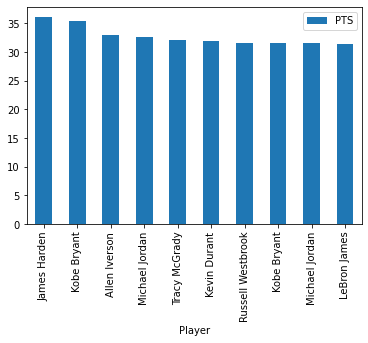

In [31]:
highest_scoring.plot.bar("Player", "PTS")

Now, let's sort who scored most every year between 1991 and 2021.

In [32]:
highest_scoring_by_year = train.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))
highest_scoring_by_year

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,9994,Michael Jordan,SG,27,CHI,82,82,37.0,12.1,22.4,0.539,0.4,1.1,0.312,11.7,21.3,0.551,0.547,7.0,8.2,0.851,1.4,4.6,6.0,5.5,2.7,1.0,2.5,2.8,31.5,1991,891.0,960.0,0.928,Chicago Bulls,61,21,0.744,0.0,110.0,101.0,8.57
1992,10007,Michael Jordan,SG,28,CHI,80,80,38.8,11.8,22.7,0.519,0.3,1.3,0.270,11.5,21.5,0.533,0.526,6.1,7.4,0.832,1.1,5.3,6.4,6.1,2.3,0.9,2.5,2.5,30.1,1992,900.0,960.0,0.938,Chicago Bulls,67,15,0.817,0.0,109.9,99.5,10.07
1993,10020,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,0.495,1.0,2.9,0.352,11.7,22.7,0.514,0.515,6.1,7.3,0.837,1.7,5.0,6.7,5.5,2.8,0.8,2.7,2.4,32.6,1993,565.0,980.0,0.577,Chicago Bulls,57,25,0.695,0.0,105.2,98.9,6.19
1994,8751,David Robinson,C,28,SAS,80,80,40.5,10.5,20.7,0.507,0.1,0.4,0.345,10.4,20.4,0.510,0.510,8.7,11.6,0.749,3.0,7.7,10.7,4.8,1.7,3.3,3.2,2.9,29.8,1994,730.0,1010.0,0.723,San Antonio Spurs,55,27,0.671,3.0,100.0,94.8,5.05
1995,7431,Shaquille O'Neal,C,22,ORL,79,79,37.0,11.8,20.2,0.583,0.0,0.1,0.000,11.8,20.1,0.585,0.583,5.8,10.8,0.533,4.2,7.3,11.4,2.7,0.9,2.4,2.6,3.3,29.3,1995,605.0,1050.0,0.576,Orlando Magic,57,25,0.695,0.0,110.9,103.8,6.44
1996,10527,Michael Jordan,SG,32,CHI,82,82,37.7,11.2,22.6,0.495,1.4,3.2,0.427,9.8,19.4,0.506,0.525,6.7,8.0,0.834,1.8,4.8,6.6,4.3,2.2,0.5,2.4,2.4,30.4,1996,1114.0,1130.0,0.986,Chicago Bulls,72,10,0.878,0.0,105.2,92.9,11.80
1997,10541,Michael Jordan,SG,33,CHI,82,82,37.9,11.2,23.1,0.486,1.4,3.6,0.374,9.9,19.5,0.507,0.516,5.9,7.0,0.833,1.4,4.5,5.9,4.3,1.7,0.5,2.0,1.9,29.6,1997,957.0,1150.0,0.832,Chicago Bulls,69,13,0.841,0.0,103.1,92.3,10.70
1998,10555,Michael Jordan,SG,34,CHI,82,82,38.8,10.7,23.1,0.465,0.4,1.5,0.238,10.4,21.5,0.482,0.473,6.9,8.8,0.784,1.6,4.2,5.8,3.5,1.7,0.5,2.3,1.8,28.7,1998,1084.0,1160.0,0.934,Chicago Bulls,62,20,0.756,0.0,96.7,89.6,7.24
1999,1148,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,0.412,1.2,4.1,0.291,7.9,17.9,0.440,0.439,7.4,9.9,0.751,1.4,3.5,4.9,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270,Philadelphia 76ers,28,22,0.560,5.0,89.7,87.6,2.56


<AxesSubplot:xlabel='Year'>

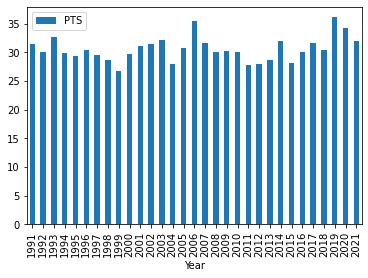

In [33]:
highest_scoring_by_year.plot.bar("Year", "PTS")

In [34]:
train.groupby("Year").apply(lambda x: x.shape[0])

Year
1991    385
1992    386
1993    390
1994    403
1995    405
1996    428
1997    441
1998    439
1999    440
2000    439
2001    441
2002    440
2003    428
2004    442
2005    464
2006    458
2007    458
2008    450
2009    443
2010    442
2011    452
2012    478
2013    467
2014    480
2015    492
2016    476
2017    486
2018    540
2019    530
2020    529
2021    540
dtype: int64

So, what stats are more correlated with MVP votes?

In [35]:
train.corr()["Share"]

Age        0.018596
G          0.089282
GS         0.167476
MP         0.162175
FG         0.276365
FGA        0.249254
FG%        0.064901
3P         0.096225
3PA        0.096460
3P%        0.030621
2P         0.275976
2PA        0.251885
2P%        0.061986
eFG%       0.058549
FT         0.316392
FTA        0.321457
FT%        0.040052
ORB        0.101375
DRB        0.213241
TRB        0.186209
AST        0.200253
STL        0.175041
BLK        0.154713
TOV        0.233015
PF         0.071046
PTS        0.288267
Year      -0.008135
Pts Won    0.995153
Pts Max    0.521335
Share      1.000000
W          0.122718
L         -0.121866
W/L%       0.126559
GB        -0.101014
PS/G       0.045206
PA/G      -0.039617
SRS        0.122782
Name: Share, dtype: float64

Game started, field goals, points average are strongly correlated with MVP votes.

<AxesSubplot:>

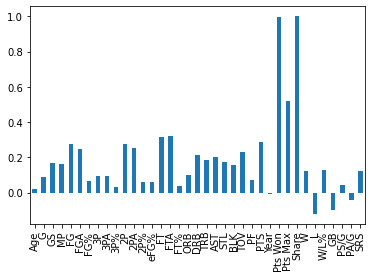

In [36]:
train.corr()["Share"].plot.bar()

# 4. Conclusion
Move on to the [third part](https://www.kaggle.com/code/vivovinco/nba-stats-mvp-prediction) to predict MVP.